# #*Task3*

In [2]:
# import required libraries :

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the dataset (we use titanic-parquet.csv)

df = pd.read_csv('titanic-parquet.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,\N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,\N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,\N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,\N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,\N,1,2,W./C. 6607,23.4500,\N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [5]:
#Data types and non-null counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [6]:
# Age has object data type so convert it into numeric type

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Summary statistics

df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,891,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,148,4
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,\N,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,687,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


##  Visualization

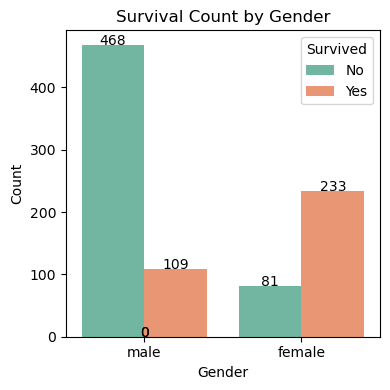

In [9]:
# Visualize Gender vs Survival

plt.figure(figsize=(4,4))
ax = sns.countplot(data=df, x='Sex', hue='Survived', palette='Set2')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center')
plt.tight_layout()
plt.show()

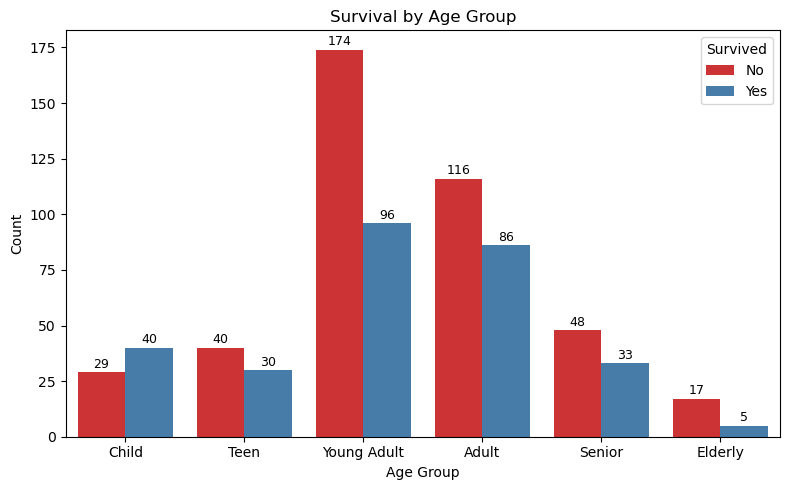

In [10]:
# Survival by Age Group

df['age_group'] = pd.cut(df['Age'], bins=[0,12,18,30,45,60,80], 
                         labels=['Child','Teen','Young Adult','Adult','Senior','Elderly'])
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='age_group', hue='Survived', palette='Set1')
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 2, 
                int(height), ha="center", fontsize=9)
plt.title("Survival by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

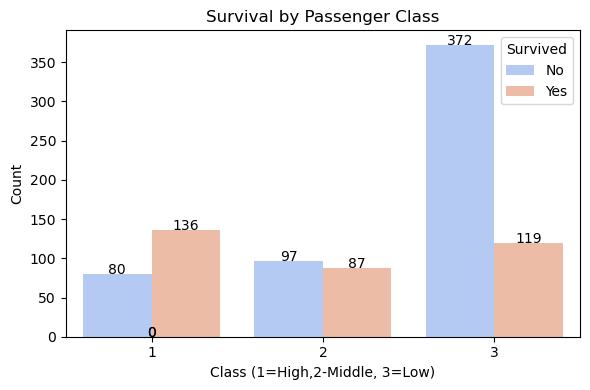

In [11]:
# Class vs Survival (Pclass = 1st, 2nd, 3rd class)

plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Pclass', hue='Survived', palette='coolwarm')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center')
plt.title('Survival by Passenger Class')
plt.xlabel('Class (1=High,2-Middle, 3=Low)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

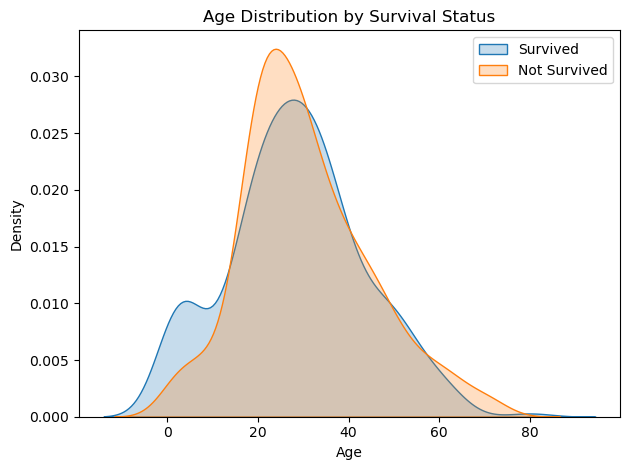

In [12]:
# Age Distribution by Survival (KDE Plot)

sns.kdeplot(data=df[df['Survived'] == 1]['Age'], label='Survived', fill=True)
sns.kdeplot(data=df[df['Survived'] == 0]['Age'], label='Not Survived', fill=True)
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

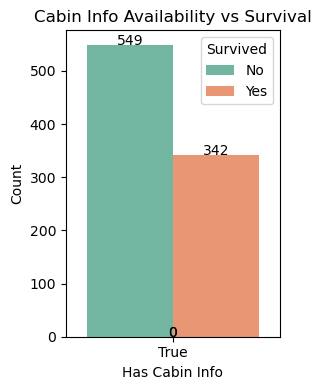

In [13]:
# Cabin Info Availability vs Survival

df['has_cabin'] = df['Cabin'].notna()
plt.figure(figsize=(3,4))
ax=sns.countplot(data=df, x='has_cabin', hue='Survived', palette='Set2')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center')
plt.title("Cabin Info Availability vs Survival")
plt.xlabel("Has Cabin Info")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

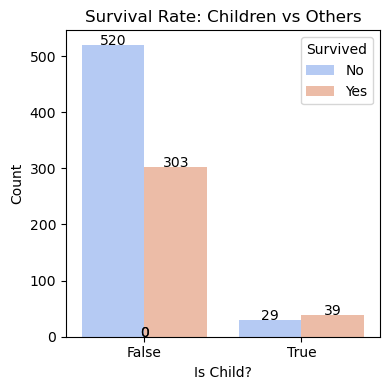

In [33]:
# Survival Rate: Children vs Others

plt.figure(figsize=(4,4))
df['is_child'] = df['Age'] < 12
ax=sns.countplot(data=df, x='is_child', hue='Survived', palette='coolwarm')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center')
plt.title("Survival Rate: Children vs Others")
plt.xlabel("Is Child?")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

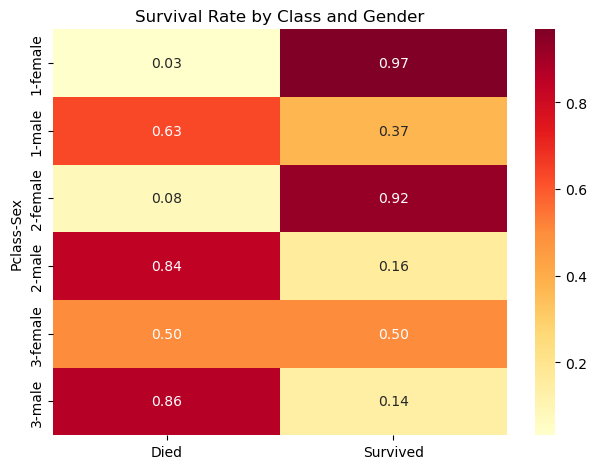

In [15]:
# Class vs Gender Survival Rate Heatmap

survival_table = pd.crosstab(index=[df['Pclass'], df['Sex']], columns=df['Survived'], normalize='index')
survival_table.columns = ['Died', 'Survived']

sns.heatmap(survival_table, annot=True, cmap='YlOrRd', fmt=".2f")
plt.title("Survival Rate by Class and Gender")
plt.tight_layout()
plt.show()


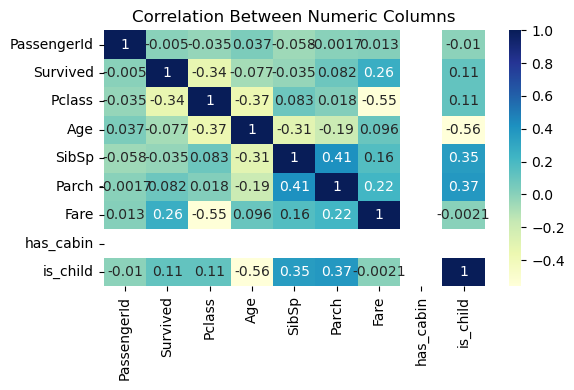

In [16]:
#Heatmap of Correlations

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('Correlation Between Numeric Columns')
plt.tight_layout()
plt.show()

## Data Visualization Task 3 Summary: Titanic Dataset